<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-VictorRegueira/blob/main/Actividades_Generales/Act_Sem7/Notebook2_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

**Ciencia y Analítica de Datos**

Por:

* Víctor Alejandro Regueira Romero - A01794404

Profesor asignado:
* Roberto Antonio Guevara González

A 8 de noviembre de 2022

# Actividad Semanal 7 **Kmeans**

## Problemática

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz


Encuentra el numero ideal de almacenes, justifica tu respuesta:

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.
Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?
¿Consideras importante que se grafique en un mapa?, ¿por qué?
Agrega las conclusiones

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 2.0 MB/s 
     |████████████████████████████████| 1.0 MB 45.9 MB/s 
     |████████████████████████████████| 1.7 MB 47.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 54.9 MB/s 
     |████████████████████████████████| 6.3 MB 44.0 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=079ea6ac8d85aa88a27dd633f1929aeac0f4e4432b151c9a53d240a72bb65a23
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=55ffdc0e382123263b066abfe2e315328e61c70aba23d544ba14741da8799f70
  Stored in directory: /root/.

Librerías principales

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importando la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Explorando los datos

In [4]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

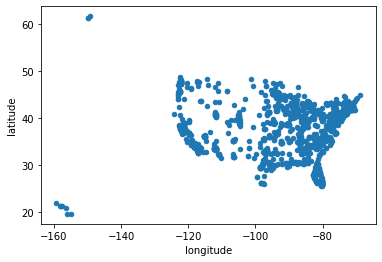

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,1839.0,37.791238,5.272299,19.647855,33.882605,38.955432,41.658341,61.577919
longitude,1839.0,-91.986881,16.108046,-159.376962,-98.268828,-87.746346,-80.084833,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

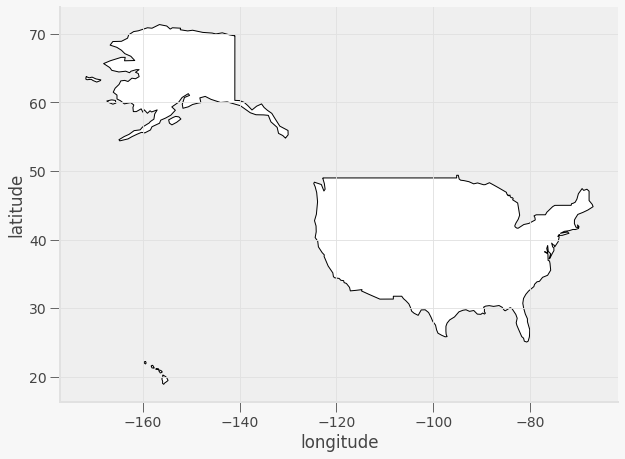

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

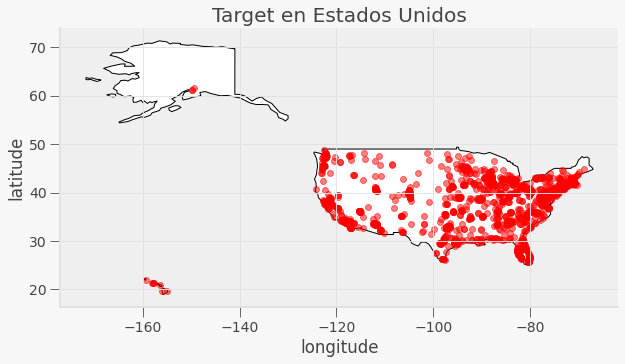

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

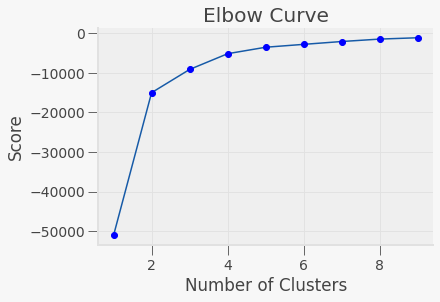

In [18]:
from sklearn.cluster import KMeans

#Definimos un rango de clusters grandes para ver el comportamiento
K_clusters = range(1,10)

#Evaluación individual de cada cluster
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

#Definimos los ejes
Y_axis = latlong[['latitude']]
X_axis = latlong[['longitude']]

#Valores por cada uno de los k_means más cercanos
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] 

#Graficamos los datos
plt.plot(K_clusters, score)
plt.plot(K_clusters, score, 'o', color="b")
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()



In [22]:
#Utilizaré 4 clusters, viendo que es cuando la variabilidad de la pendiente disminuye bastante.
#Realizo los 4 clusters
kmeans = KMeans(n_clusters = 4, init ='k-means++')
#Ajustamos los resultados
kmeans.fit(latlong[latlong.columns[0:3]])
# ahora guardamos los resultados
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 3, 3, 1], dtype=int32)

In [29]:
X = df[["longitude","latitude"]]

kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) 


gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C


,0,1,Coordinates
0,-75.267201,40.341984,POINT (-75.26720 40.34198)
1,-119.146456,37.577577,POINT (-119.14646 37.57758)
2,-84.792984,36.546645,POINT (-84.79298 36.54665)
3,-96.957199,37.008762,POINT (-96.95720 37.00876)


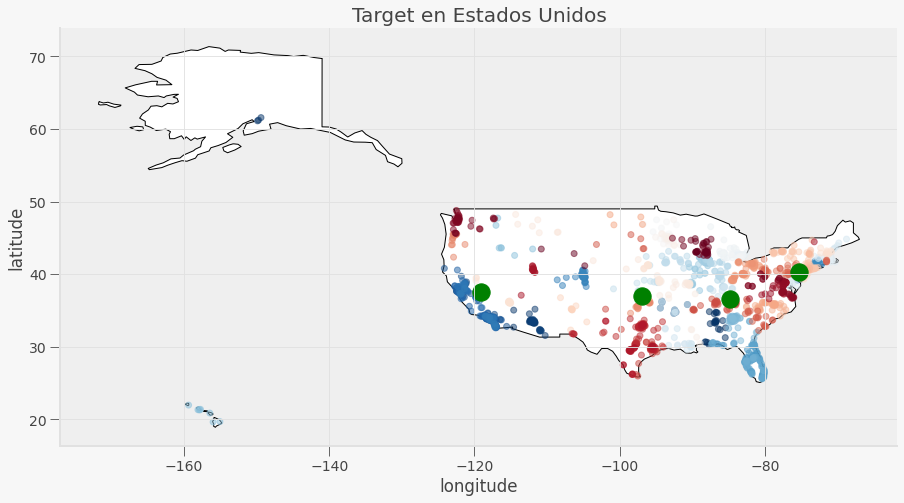

In [81]:
fig, gax = plt.subplots(figsize=(15,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white') #Aqui traemos el mapa de los unites

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, cmap='RdBu_r', alpha = 0.5) #Grafica los datos completos
gdf_C.plot(ax=gax, color='green', alpha = 1, markersize = 300) #Graficamos los puntos principales encontrados con el Kmean

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


In [47]:
#Conteo de tiendas por cada almacen
latlong['kmeans'] = kmeans.labels_  
latlong.loc[:, 'kmeans'].value_counts()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2    615
0    454
3    401
1    369
Name: kmeans, dtype: int64

In [32]:
gdf_C

,0,1,Coordinates
0,-75.267201,40.341984,POINT (-75.26720 40.34198)
1,-119.146456,37.577577,POINT (-119.14646 37.57758)
2,-84.792984,36.546645,POINT (-84.79298 36.54665)
3,-96.957199,37.008762,POINT (-96.95720 37.00876)


In [37]:
gdf_C.shape

(4, 3)

In [42]:
from pandas.core.internals.concat import concat_arrays


Location1 = str(gdf_C[1][0]) + ", " + str(gdf_C[0][0]) #Aqui es alrevez, osea la coordenada x esta en la columna 1, y la y en la columna 0 , por eso medio misterioso esta llamada
print(Location1)
Location2 = str(gdf_C[1][1]) + ", " + str(gdf_C[0][1])
print(Location2)
Location3 = str(gdf_C[1][2]) + ", " + str(gdf_C[0][2])
print(Location3)
Location4 = str(gdf_C[1][3]) + ", " + str(gdf_C[0][3])
print(Location4)

40.34198355132158, -75.26720101629957
37.57757741219512, -119.14645561138212
36.54664540829268, -84.79298400162601
37.008762029675815, -96.95719874638404


In [44]:
#Distancia entre cada uno de los almacenes
 
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="my-application") #Inicializamos la libreria
Locations = [Location1, Location2, Location3, Location4] 

for i in Locations:
  location = geolocator.reverse(i) 
  print('almacen en ---', location.address)



almacen en --- Green Street, Hilltown Township, Bucks County, Pennsylvania, 18962, United States
almacen en --- Mammoth Trail, Madera County, California, United States
almacen en --- SR 154, Pickett County, Tennessee, United States
almacen en --- 322nd Road, Cowley County, Kansas, United States


In [83]:
#Obtengo las distancias entre los 4 almacenes

distancia1 = str(geodesic(Location1, Location2).miles)
print("\nDistancia entre el primer y segundo almacén : ", distancia1, " ml \n") 
distancia2 = str(geodesic(Location2, Location3).miles)
print("Distancia entre el segundo y tercer almacén : ", distancia2, " ml \n")
distancia3 = str(geodesic(Location3, Location4).miles)
print("Distancia entre el tercer y cuarto almacén : ", distancia3, " ml \n")
distancia4 = str(geodesic(Location4, Location1).miles)
print("Distancia entre el cuarto y primer almacén : ", distancia4, " ml \n")
distancia5 = str(geodesic(Location4, Location2).miles)
print("Distancia entre el cuarto y segundo almacén : ", distancia5, " ml \n")


Distancia entre el primer y segundo almacén :  2346.708041565729  ml 

Distancia entre el segundo y tercer almacén :  1889.2339637145571  ml 

Distancia entre el tercer y cuarto almacén :  675.0397255714342  ml 

Distancia entre el cuarto y primer almacén :  1191.9690858464746  ml 

Distancia entre el cuarto y segundo almacén :  1220.3312246034995  ml 



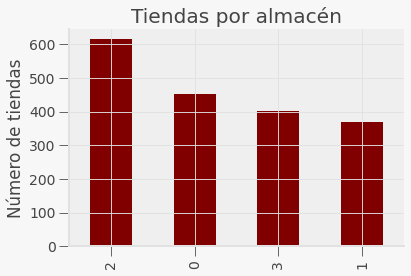

In [61]:
#Conteo de tiendas por cada almacen
plt.title('Tiendas por almacén')
plt.ylabel('Número de tiendas')
latlong.kmeans.value_counts().plot(kind='bar', color='maroon')
plt.show()


In [66]:
df_lugares = pd.DataFrame(latlong.kmeans.value_counts())

In [65]:
latlong.loc[:, 'kmeans'].value_counts()

2    615
0    454
3    401
1    369
Name: kmeans, dtype: int64

In [68]:
df_lugares

,kmeans
2,615
0,454
3,401
1,369


In [72]:
from pandas import Series
df_lugares.index = Series(['Tennessee', 'Pennsylvania', 'Kansas', 'California'])

In [75]:
df_lugares

,kmeans
Tennessee,615
Pennsylvania,454
Kansas,401
California,369


## Conclusiones

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?

> Las latitudes y las longitudes de los almacenes se presentan en la variable Location[1-4] de la siguinte manera:
* 40.34198355132158, -75.26720101629957
* 37.57757741219512, -119.14645561138212
* 36.54664540829268, -84.79298400162601
* 37.008762029675815, -96.95719874638404

>Sin embargo, la mejr forma de visualizar estos lugares es representando los Estados donde se encuentran. Y al mismo tiempo presentaré el número de tiendas que deberá de tener cada uno de estos almacenes. Estos datos se encuentran almacenados en el DataFrame **df_lugares**, así tendremos facil acceso a nuestros resultados finales.
* Tennessee 	615
* Pennsylvania 	454
* Kansas 	401
* California 	369

>Cada uno de estos almacenes se enceuntran a distancias entre **1000 y 2400 millas**, para esto usamos las variables distancia[1-5], identificando las combinaciones y distancias entre los almacenes:
* Distancia entre el primer y segundo almacén :  2346.708041565729  ml 
* Distancia entre el segundo y tercer almacén :  1889.2339637145571  ml 
* Distancia entre el tercer y cuarto almacén :  675.0397255714342  ml 
* Distancia entre el cuarto y primer almacén :  1191.9690858464746  ml 
* Distancia entre el cuarto y segundo almacén :  1220.3312246034995  ml 

¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

>Para elegir el número de almacenes me basé en la representación del gráfico elbow, el cuál nos indica los aumentos de valores entre cada uno de los clústers propuestos, en este caso colocamos 9, y se identificó que el clúster número 3 era el que más impacto tenía y que a partir del clúster **4** se disminuía drásticamente los valores acumulativos de los Kmeans, es por esto que he definido la cantidad en 4, siendo así un valor que almacena el último valor acumulativo con gran impacto de nuestro gráfico.

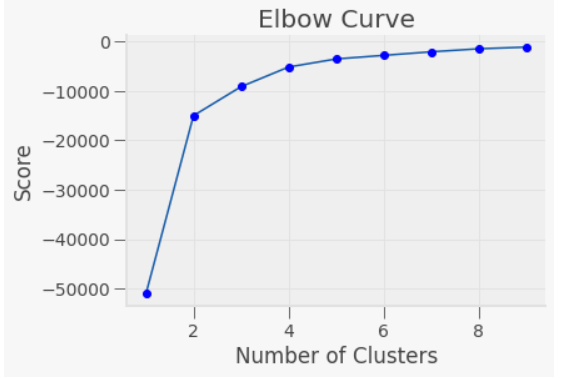



¿qué librerías nos pueden ayudar a graficar este tipo de datos?

>La librería que utilizamos durante este desarrollo fue la de geopandas, que me permitió presentar los datos a través de un gráfico de los Estados de EE.UU, siendo de gran utilidad para ver los puntos críticos obtenidos.

Otras librerías que también son de utilidad son las siguientes:



> GeoViews: esta librería permite desplegar mapas interactivos para la web.

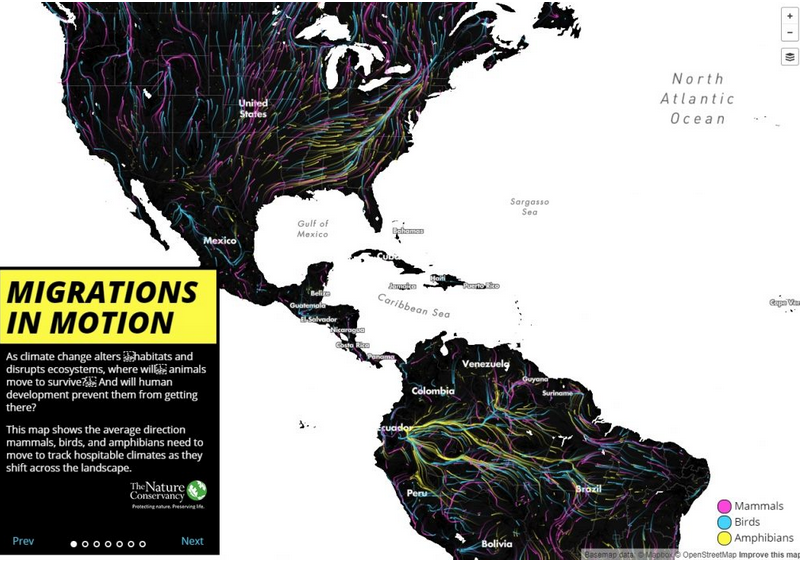

*https://www.cursosgis.com/librerias-de-python-para-trabajar-con-datos-espaciales/*

> Folium: Leaflet es una librería JavaScript que nos permite publicar mapas en la web de forma rápida y eficaz. La unión de Leaflet y **Python llega de la mano de Folium**. Mediante Folium podemos manipular los datos en Python y visualizar los resultados en Leaflet.

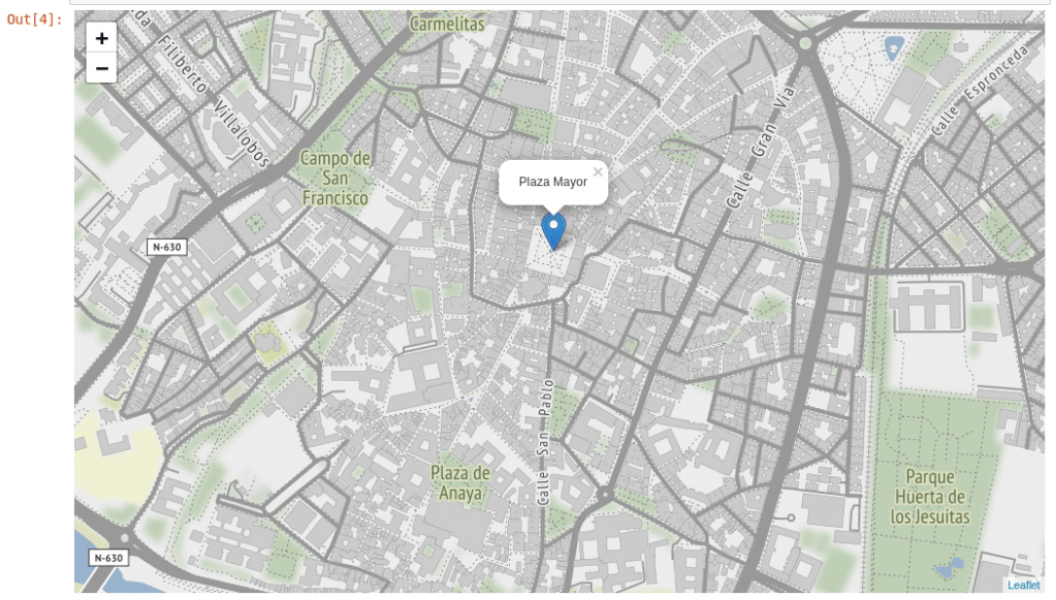

*https://mappinggis.com/2022/04/15-librerias-de-python-para-gis/*

> Cartopy: se ha diseñado para el procesamiento de datos geoespaciales con el fin de producir mapas y otros análisis de datos geoespaciales. Hace uso de las poderosas bibliotecas PROJ, NumPy y Shapely e incluye una interfaz  construida sobre Matplotlib para la creación de mapas con calidad de publicación.

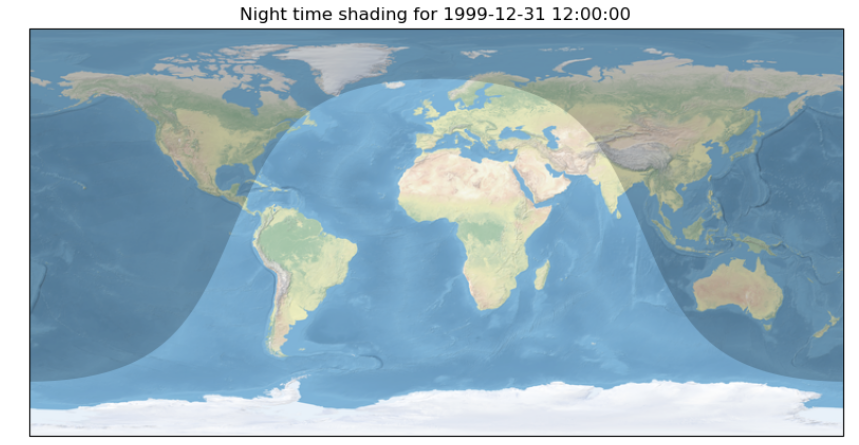

*https://mappinggis.com/2022/04/15-librerias-de-python-para-gis/*

>*El procesamiento de datos es, en general, la obtención y manipulación de elementos de datos para producir información significativa. Así pues, a través del geoprocesamiento, se manipulan los datos espaciales con el objetivo de presentarlos en un **contexto específico.** En cuanto al procesamiento de datos vectoriales aparecen dos tendencias claras: una serie de librerías orientadas a la generación de scriptlets de forma intuitiva y sencilla (GeoScript/Shapely); y librerías clásicas de geoprocesamiento a nivel servidor (GEOS/JTS/GeoTools).*

Alejandro Díaz(2014). Geoprocesamiento. https://panorama-sig-libre.readthedocs.io/es/latest/librerias/

Mi opinión personal es que así como en distintos ámbitos el desarrollo de librerías ha promovido y facilitado la resolución de casos específicos, el tema de librerías que ayudan al entendimiento de datos geográfico forma parte de una rama de datos que estaremos viendo mucho en próximos años. Los temas de calentamiento global, índices de población, ingresos, etc Son índoles donde la presentación de datos gráficos y procesamiento de datos es muy importante tanto para el entendimiento del problema como para su resolución y transferencia de conocimiento hacia otras áreas.

¿Consideras importante que se grafique en un mapa?, ¿por qué?

>Por supuesto que sí. Para esto vamos a entender que las áreas principales en las que se dividen los equipos de trabajo en una empresa de TI son el área de negocio y el área técnica.
Nosotros como área técnica tenemos el deber de procesar la información, realizar limpieza, explorar los datos, generar insights y sustentar nuestros desarrollos basándonos en metodologías orientadas al modelado y análisis de información. Por lo que, debemos de tener la capacidad de transmitir esa información hacia el área de negocio, principalmente se recurren a los gráficos para presentar el texto plano de tablas en una forma más simple de representar los datos.
Para este caso estamos trabajando con ubicaciones, especificamente estados de EE.UU, por lo tanto, presentar la información de puntos críticos a través de un mapa para propponer localizaciones de almacenes genera un impacto muy fuerte al área de negocio, debido a que la transferencia de información y especialmente resultados es clara y fácil de explicar.

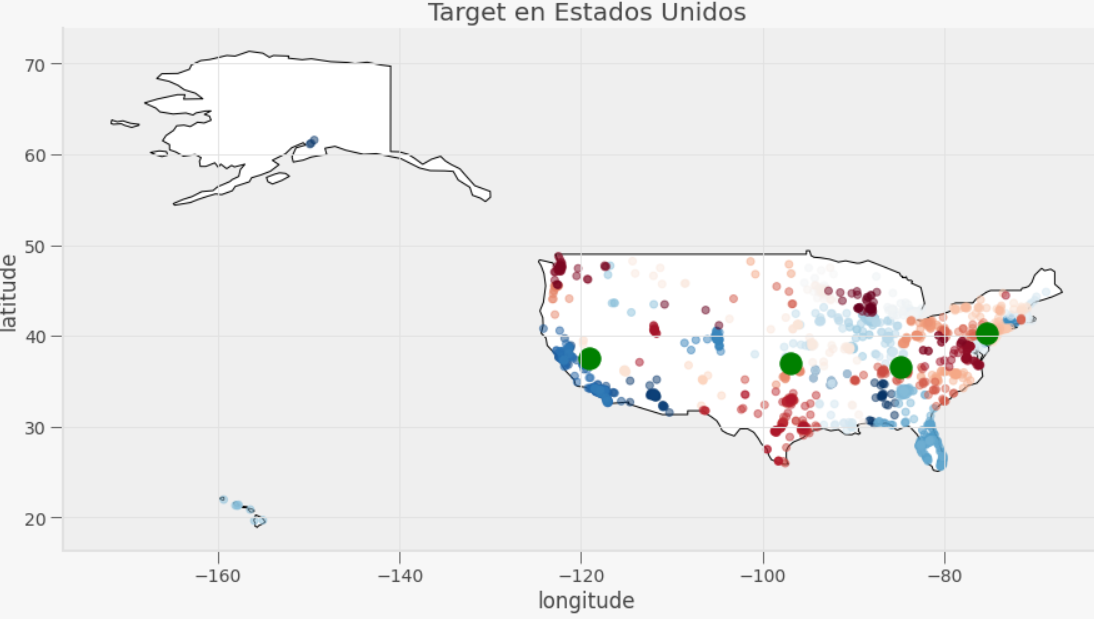